# Visualize

# 1. Synthetic

In [1]:
disp ('executing gpml startup script...')
mydir = fileparts (mfilename ('fullpath'));                 % where am I located
addpath (mydir)
dirs = {'cov','doc','inf','lik','mean','prior','util'};           % core folders
for d = dirs, addpath (fullfile (mydir, d{1})), end
dirs = {{'util','minfunc'},{'util','minfunc','compiled'}};     % minfunc folders
for d = dirs, addpath (fullfile (mydir, d{1}{:})), end
% addpath([mydir,'/util/sparseinv'])
pkg load statistics

executing gpml startup script...


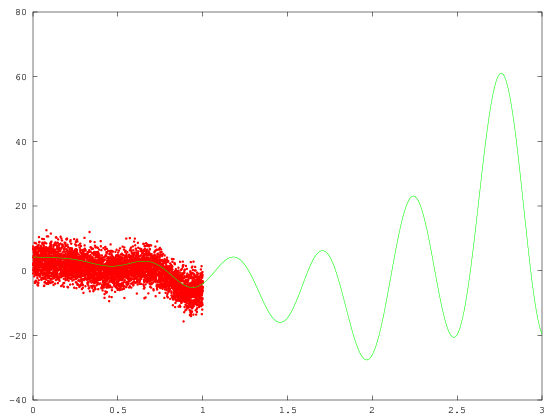

In [2]:
ns = 5000;
x = rand(ns, 1);
y = 5*x.^2.*sin(12*x)+(x.^3-0.5).*sin(3*x-0.5)+4*cos(2*x);  % 20 noisy training targets
noise =  3*(randn(ns, 1)-0.5);
y = y + noise;

hold on
plot(x, y, 'r.')

xs = 0:0.01:3.0;
xs = xs';
ys = 5*xs.^2.*sin(12*xs)+(xs.^3-0.5).*sin(3*xs-0.5)+4*cos(2*xs);  % 20 noisy training targets
plot(xs, ys, 'g');

In [3]:
sf2 = 1 ; ell = 1 ; sn2 = 0.1 ; 
d = size(x,2);
hyp.cov = log([ones(d,1)*ell;sf2]); hyp.lik = log(sn2); hyp.mean = [];
opts.Xnorm = 'N' ; opts.Ynorm = 'N' ;
opts.Ms = 10 ;
opts.ell = ell ; opts.sf2 = sf2 ; opts.sn2 = sn2 ;
opts.meanfunc = []; opts.covfunc = @covSEard; opts.likfunc = @likGauss; opts.inffunc = @infGaussLik ;

In [4]:
meanfunc = [];                    % empty: don't use a mean function
covfunc = opts.covfunc;              % Squared Exponental covariance function
likfunc = opts.likfunc;              % Gaussian likelihood
inffunc = opts.inffunc;

In [5]:
hyp2 = minimize(hyp, @gp, -100, inffunc, meanfunc, covfunc, likfunc, x, y)

Function evaluation    100;  Value 1.256036e+04
hyp2 =

  scalar structure containing the fields:

    cov =

      -1.7400
       1.1524

    lik =  1.0882
    mean = [](0x0)



## Basic visualization

Green line: ground truth. Blue line & grey area: predicted mean and 2 std.

In [6]:
[mu s2] = gp(hyp2, @infGaussLik, meanfunc, covfunc, likfunc, x, y, xs);

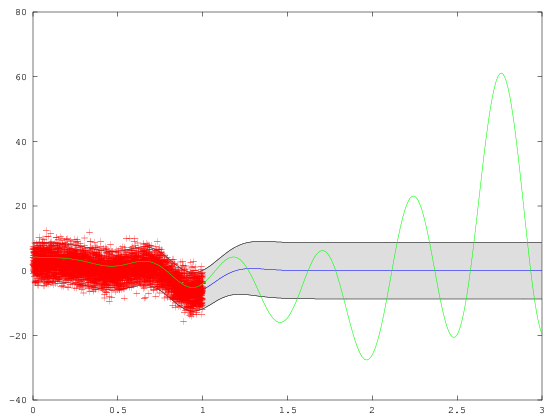

In [7]:
f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
hold on; plot(xs, mu); plot(x, y, 'r+');
plot(xs, ys, 'g');

In [8]:
partitionCriterion = 'kmeans'; %, 'kmeans', 'knkmeans'
opts.numOptFC = 25 ;
opts.partitionCriterion = partitionCriterion ;
[models,t_dGP_train] = aggregation_train(x,y,opts) ;

Linesearch     25;  Value 1.259181e+04


## Visualization of each sub-model

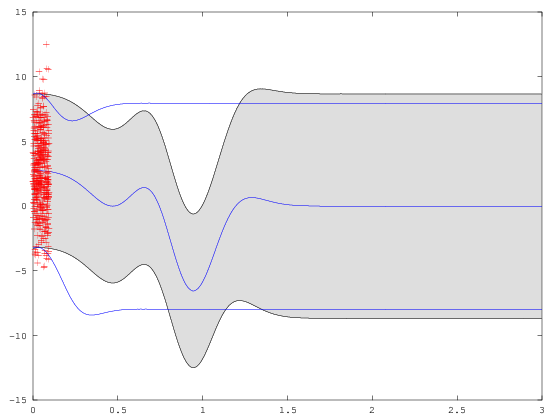

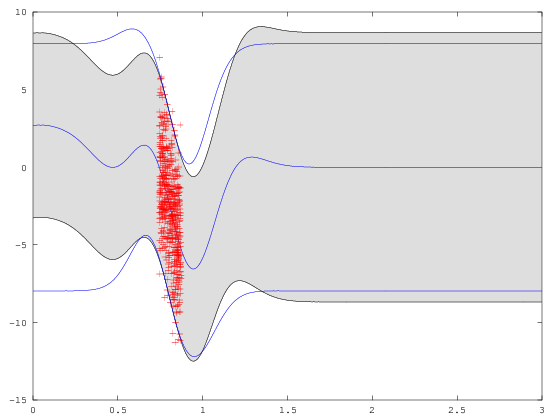

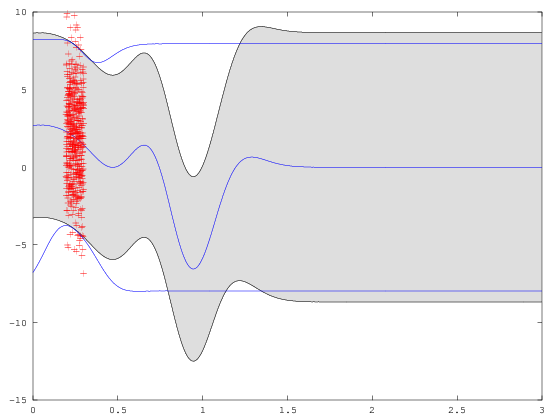

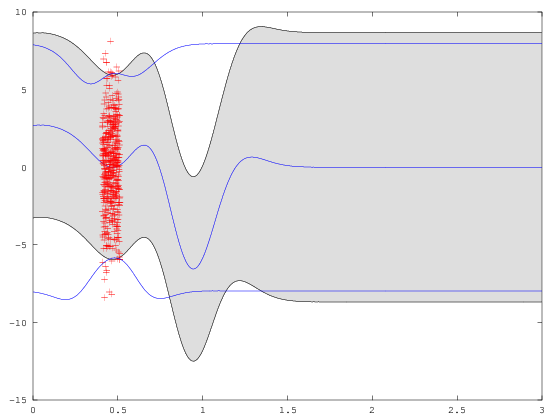

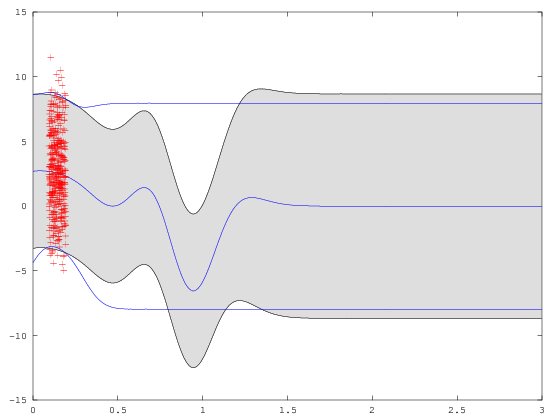

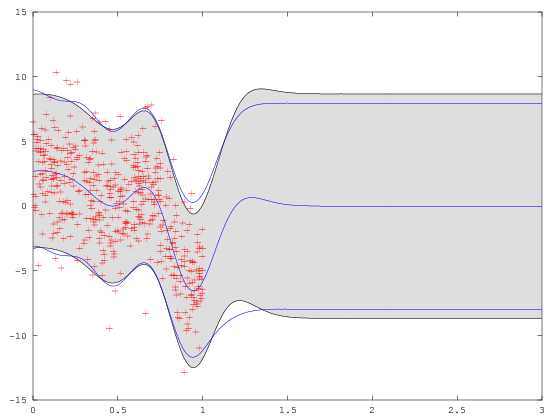

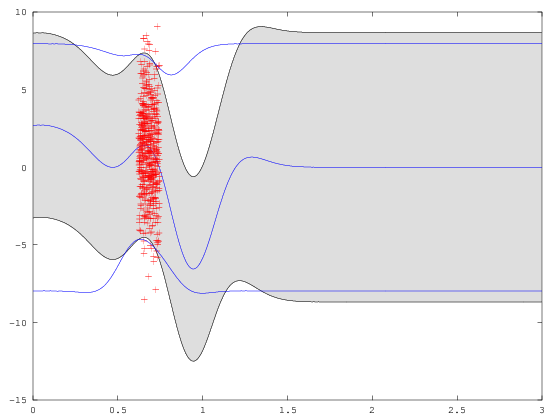

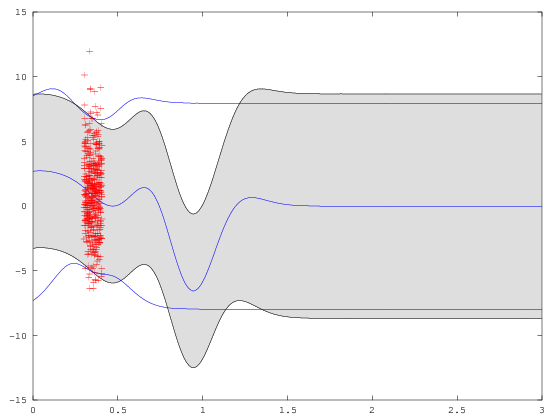

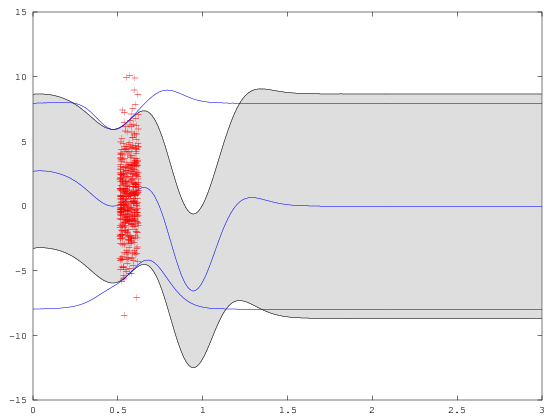

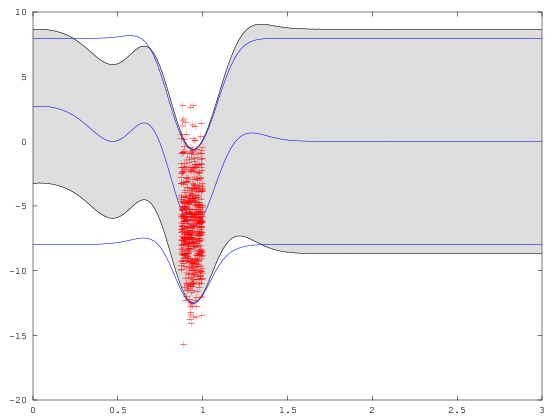

In [11]:
for i=1:10
    [tmu,ts2] = gp(models{i}.hyp,models{i}.inffunc,models{i}.meanfunc, ...
                                   models{i}.covfunc,models{i}.likfunc,models{i}.X_norm,models{i}.Y_norm,xs);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(models{i}.X, models{i}.Y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

## Different q cause very different results

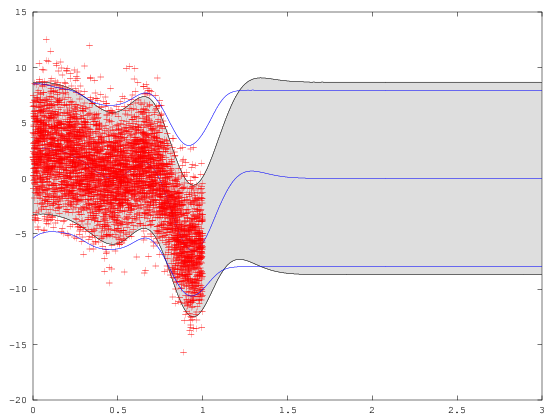

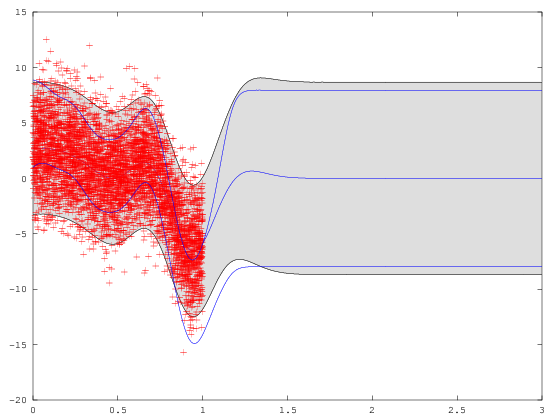

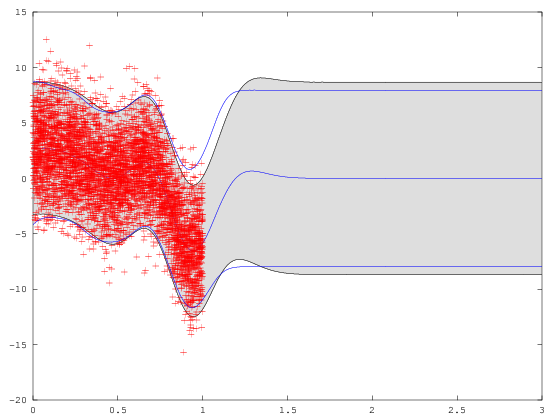

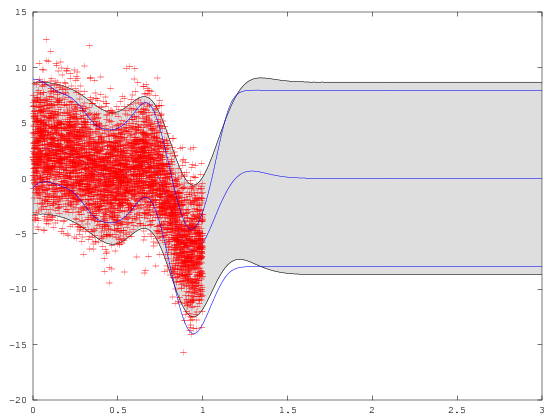

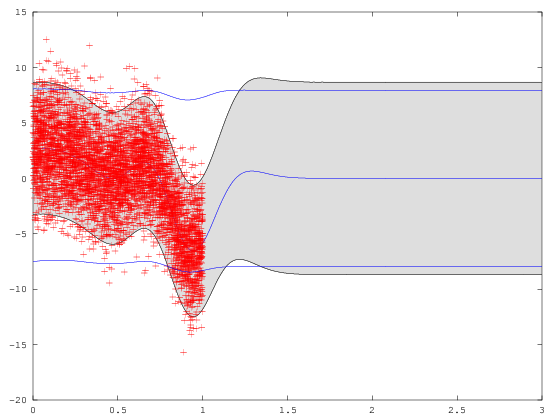

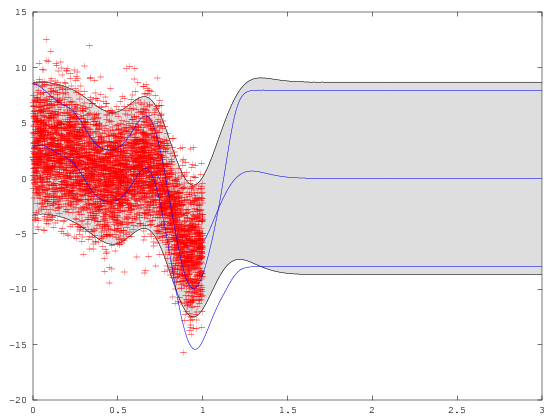

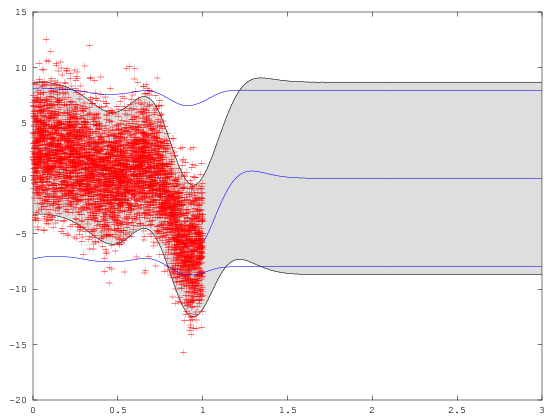

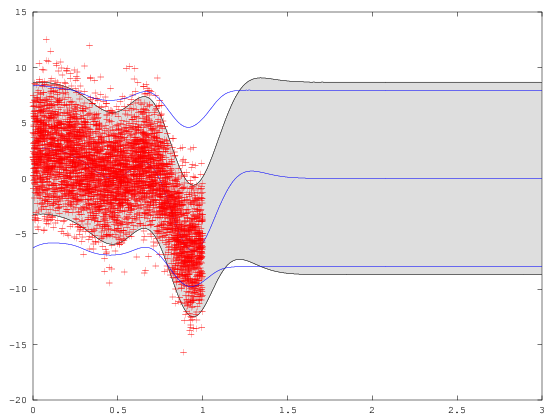

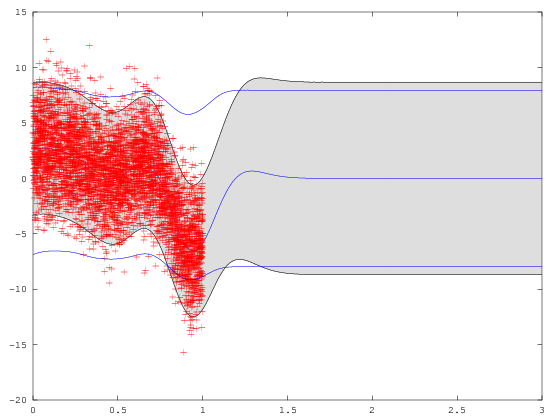

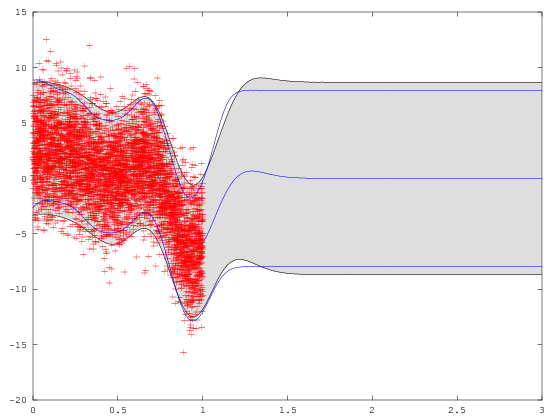

In [12]:
criterion = 'TERBCM';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(x, y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

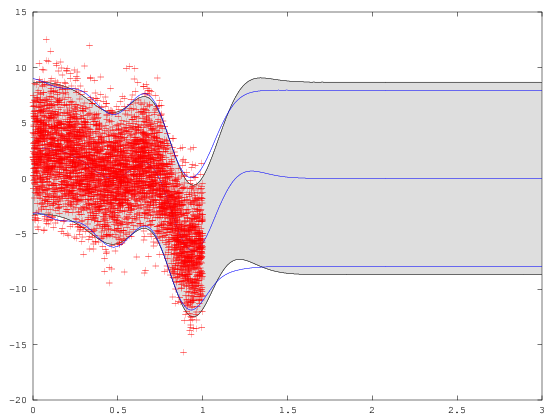

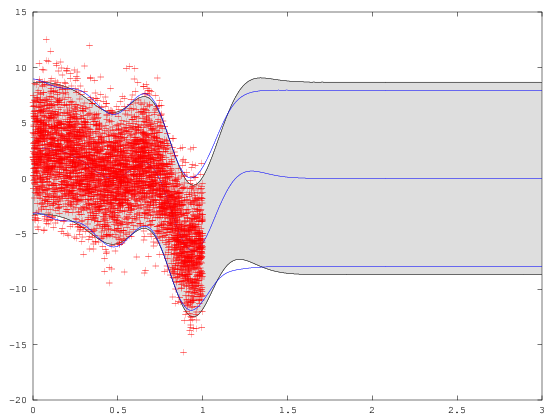

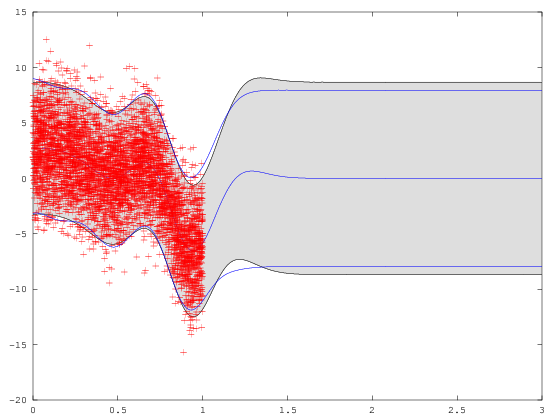

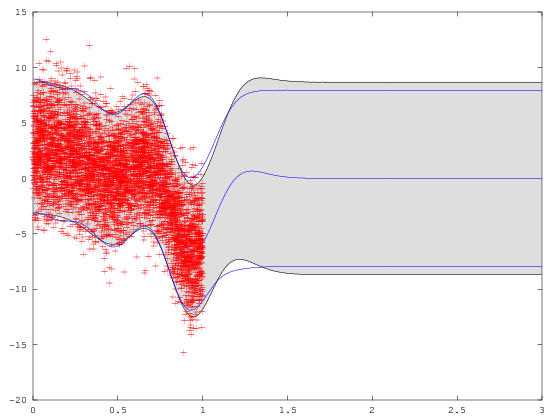

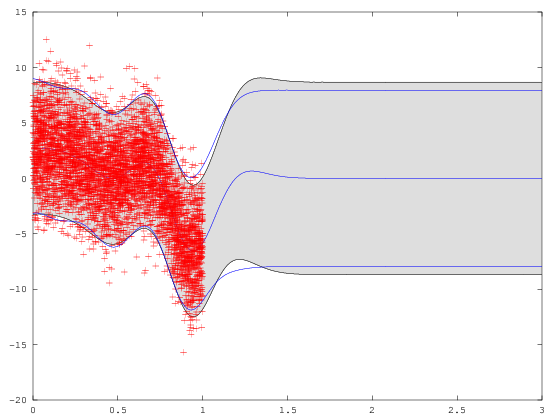

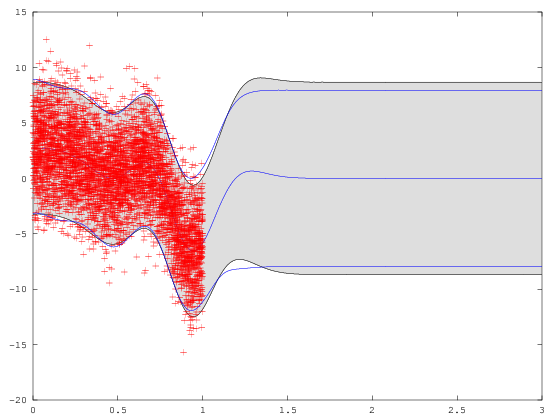

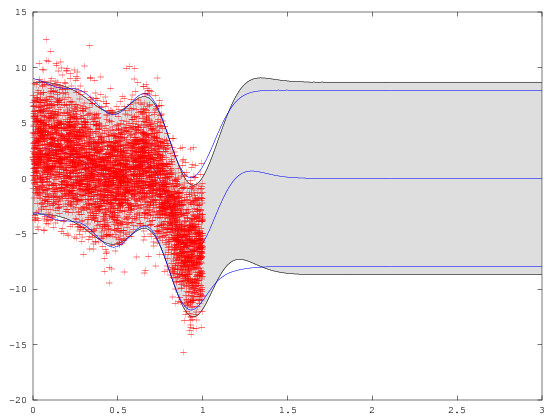

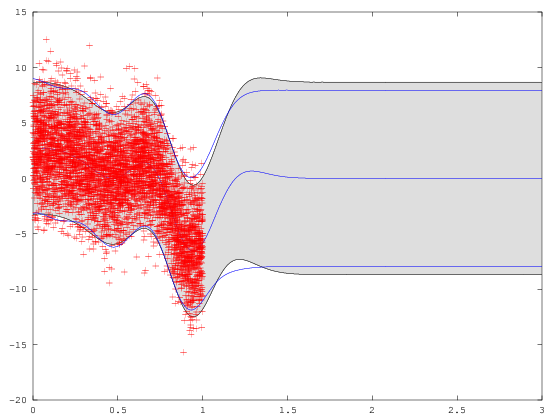

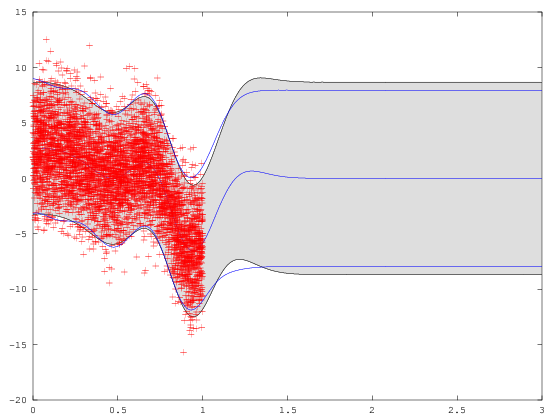

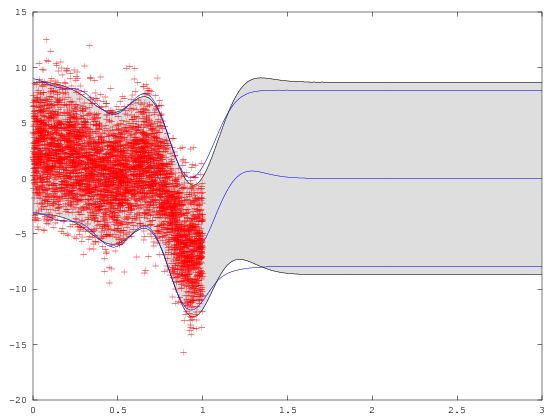

In [13]:
criterion = 'TEGRBCM';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(x, y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

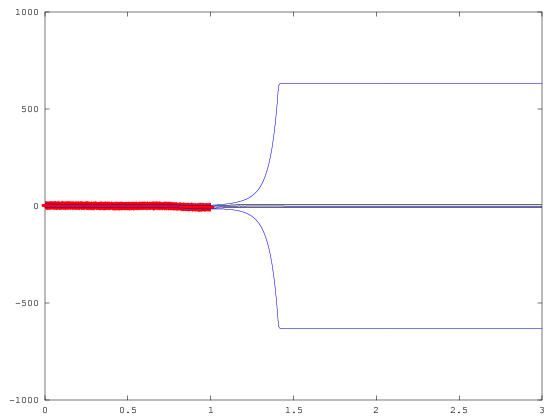

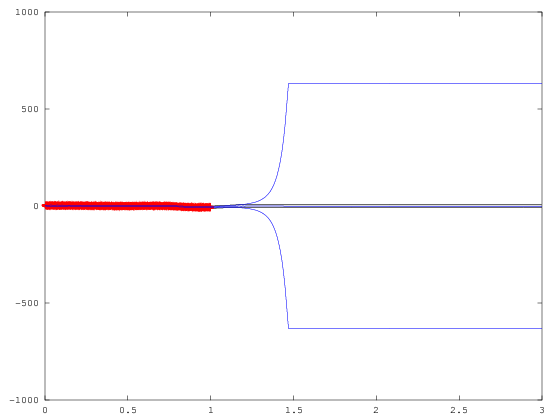

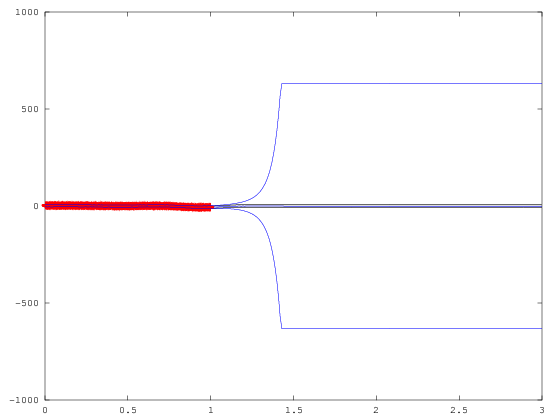

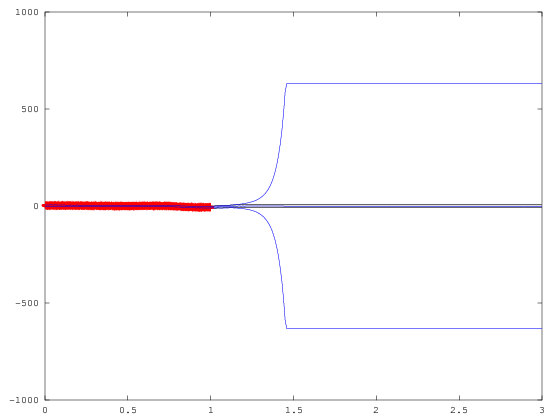

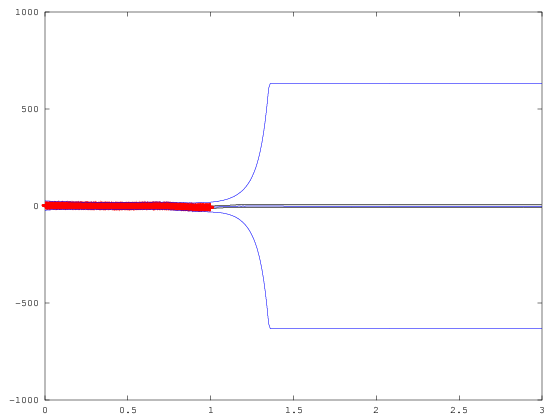

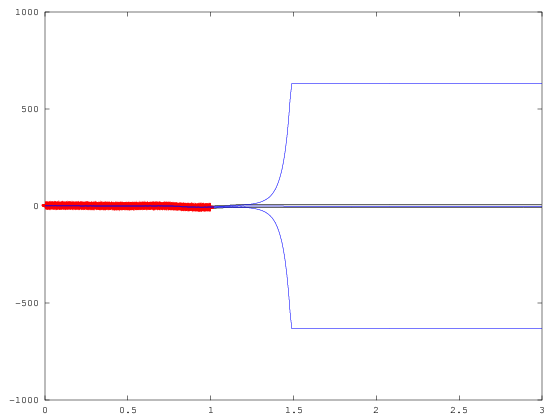

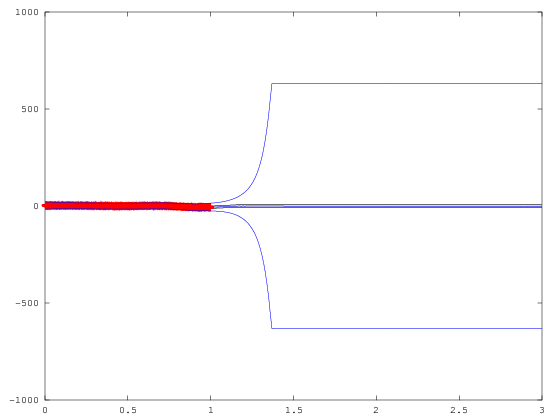

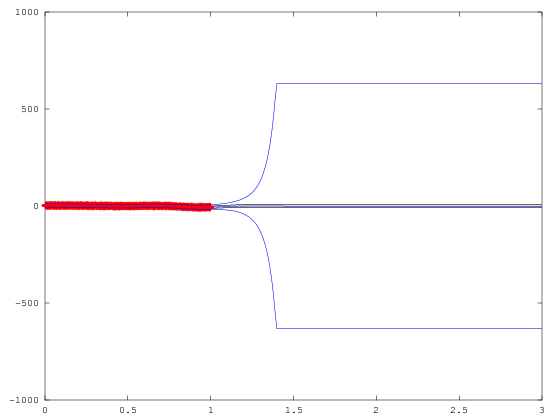

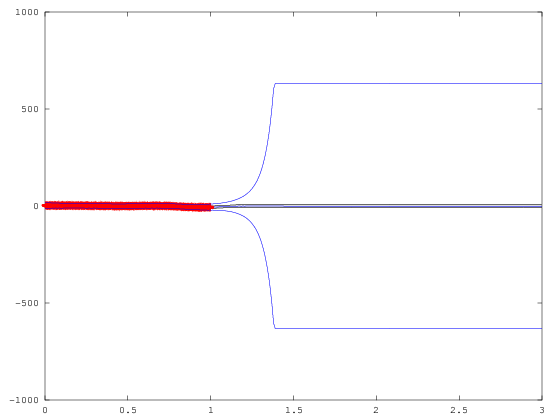

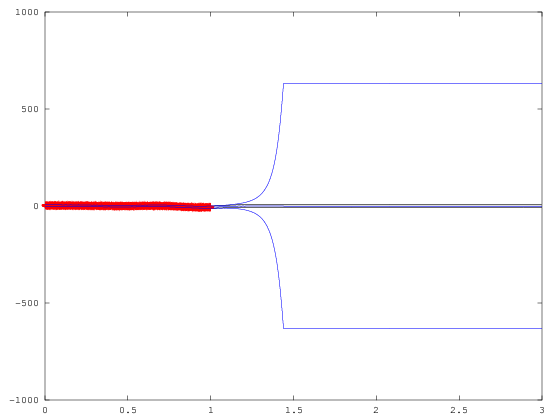

In [14]:
criterion = 'TEGPoE';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(x, y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

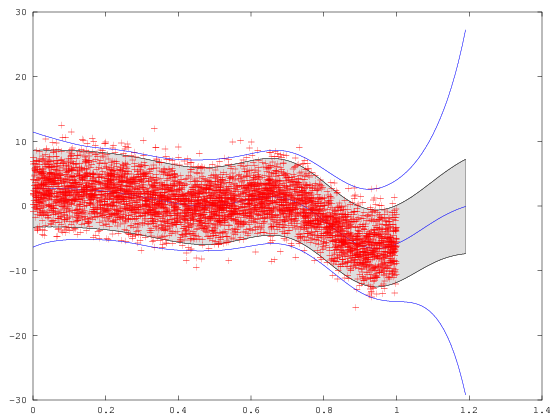

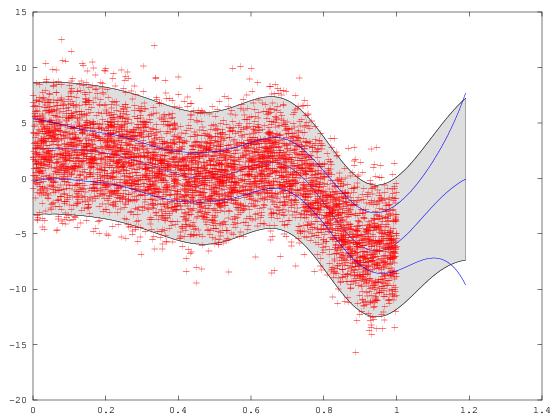

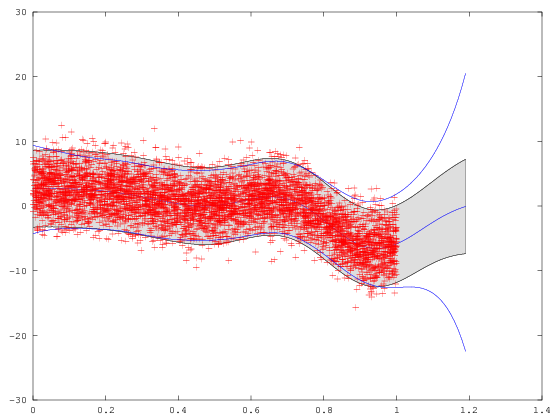

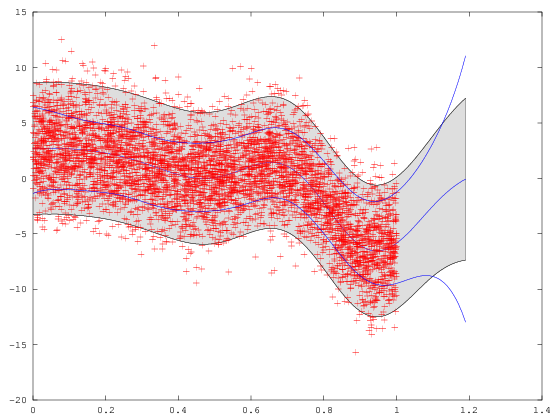

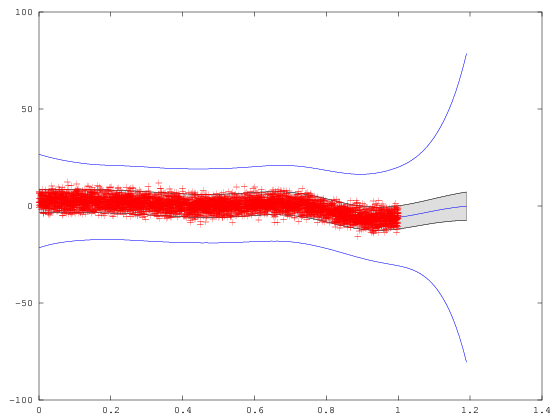

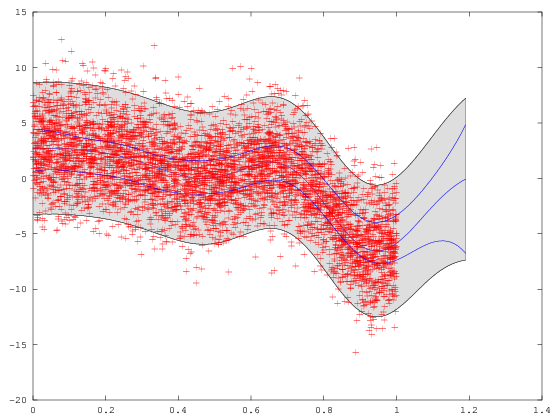

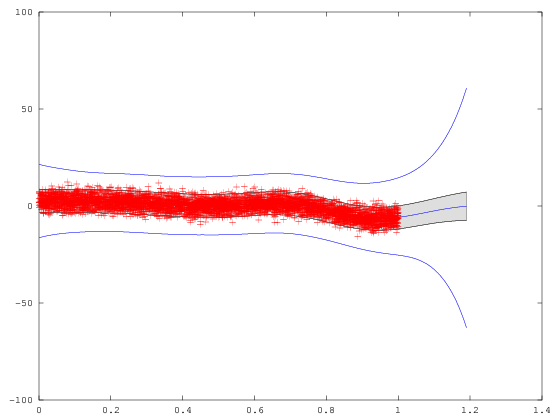

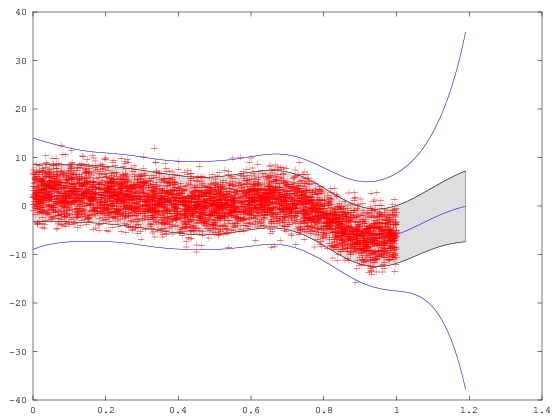

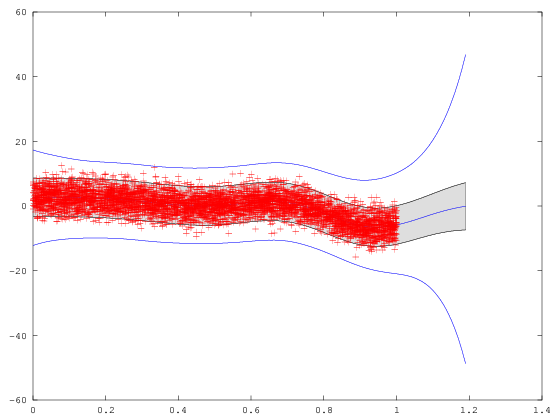

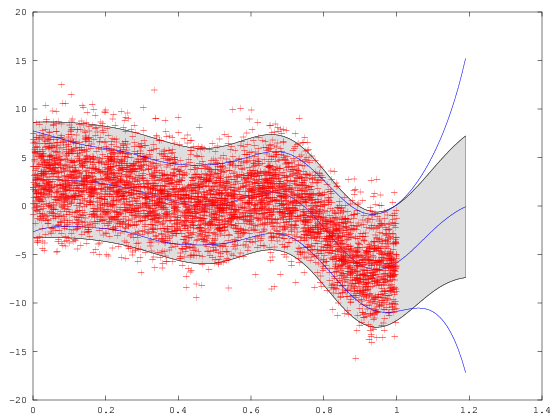

In [15]:
criterion = 'TEGPoE';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu(1:120)+2*sqrt(s2(1:120)); flipdim(mu(1:120)-2*sqrt(s2(1:120)),1)];
    fill([xs(1:120); flipdim(xs(1:120),1)], f, [7 7 7]/8)
    plot(xs(1:120), mu(1:120)); plot(x, y, 'r+');
    plot(xs(1:120), tmu(1:120)+2*sqrt(ts2(1:120))); plot(xs(1:120), tmu(1:120)-2*sqrt(ts2(1:120)));
endfor

# 2. Basic

## Energy


Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


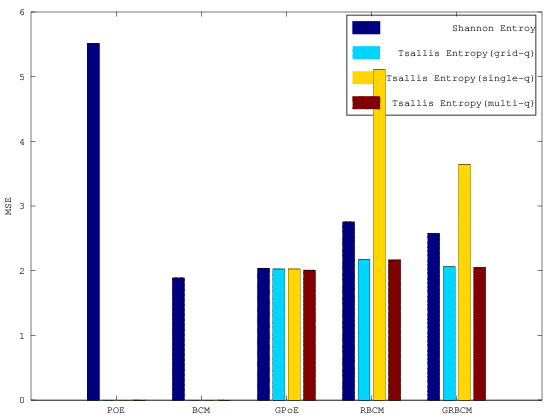

In [16]:
% energy m30
y = [5.51609162 0 0 0; 
    1.88924555 0 0 0; 
    2.03851176 2.02814133 2.02909086 2.00906289; 
    2.75557926 2.17596357 5.11128466 2.16642973; 
    2.57884549 2.06285324 3.64692409 2.05246987];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSE')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');



Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


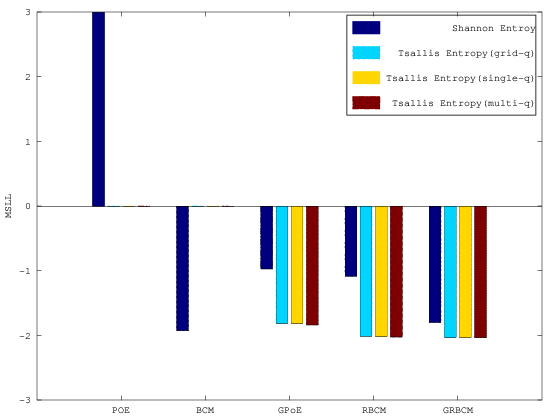

In [17]:
% energy m30
y = [2.9959 0 0 0; 
    -1.9250 0 0 0; 
    -0.9711 -1.8160 -1.8148 -1.8370; 
    -1.0840 -2.0118 -2.0143 -2.0243; 
    -1.8003 -2.0308 -2.0309 -2.0354];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSLL')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');


## Protein


Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


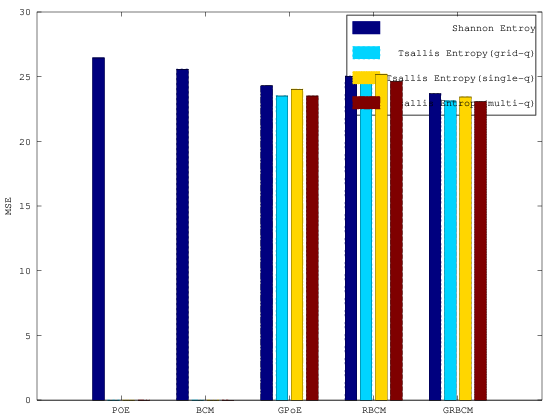

In [19]:
%protein m30
y = [26.46774598 0 0 0; 
    25.59297575 0 0 0; 
    24.31338867 23.52038938 24.04188591 23.5154; 
    25.05414455 24.98445947 25.20450251 24.64963770; 
    23.69895202 23.14018847 23.44325267 23.06750889];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSE')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');



Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


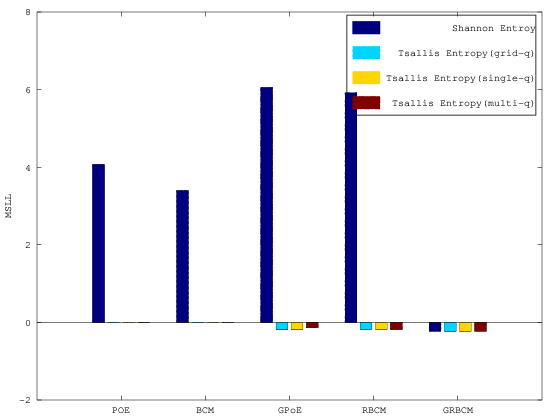

In [20]:
% protein m30
y = [4.0657 0 0 0; 
    3.4002 0 0 0; 
    6.0500 -0.1842 -0.1823 -0.1365; 
    5.9183 -0.1754 -0.1738 -0.1783; 
    -0.2228 -0.2237 -0.2238 -0.2244];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSLL')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');


## Electrical


Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


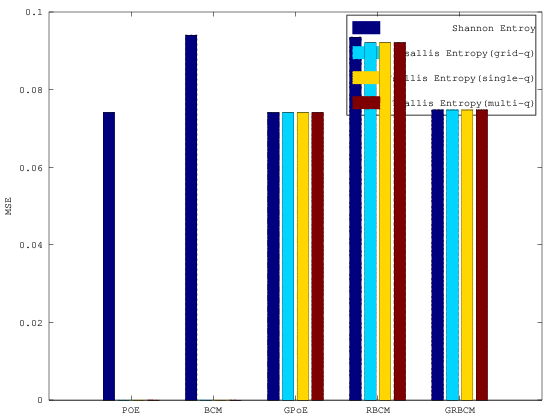

In [21]:
y = [0.07413277 0 0 0; 
    0.09406687 0 0 0; 
    0.07413276 0.07413272 0.07413274 0.07413264; 
    0.09354422 0.09209859 0.09209855 0.09209854; 
    0.07481737 0.07480678 0.07481696 0.07481696];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSE')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');



Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


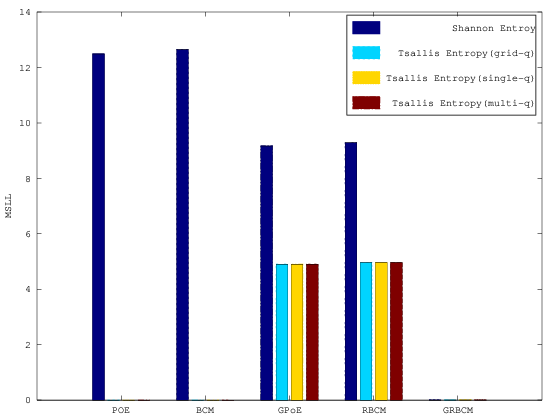

In [22]:
y = [12.4916 0 0 0; 
    12.6555 0 0 0; 
    9.1719 4.9040 4.9040 4.9040; 
    9.2924 4.9683 4.9682 4.9682; 
    0.0046 0.0045 0.0046 0.0046];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSLL')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');


## Bike


Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


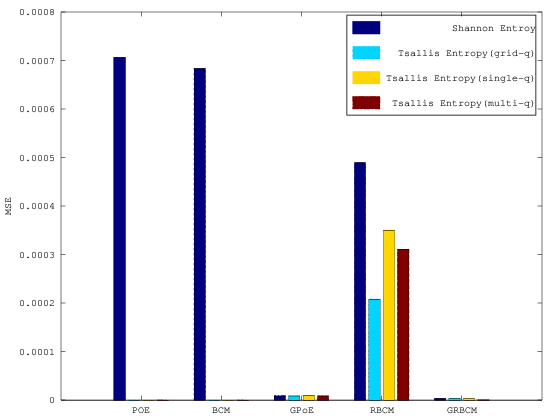

In [23]:
y = [0.00070672 0 0 0; 
    0.00068380 0 0 0; 
    0.00000870 0.00000836 0.00001004 0.00000842; 
    0.00048953 0.00020808 0.00035061 0.00031100; 
    0.00000352 0.00000350 0.00000351 0.00000009];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSE')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');



Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
    __unimplemented__ at line 524 column 5
error: 'categorical' undefined near line 1 column 5


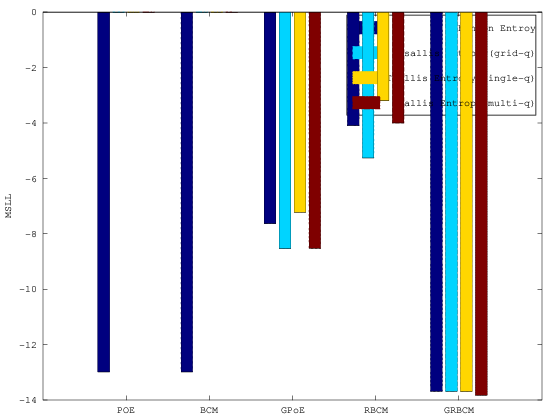

In [24]:
y = [-12.9847 0 0 0; 
    -12.9848 0 0 0; 
    -7.6332 -8.5321 -7.2188 -8.5209; 
    -4.0999 -5.2599 -3.1951 -4.0004; 
    -13.6828 -13.6828 -13.6841 -13.8204];
c = categorical({'POE','BCM','GPoE','RBCM','GRBCM'});
bar(y)
set(gca,'xticklabel',{'POE','BCM','GPoE','RBCM','GRBCM'});
ylabel('MSLL')
legend('Shannon Entroy','Tsallis Entropy(grid-q)', 'Tsallis Entropy(single-q)','Tsallis Entropy(multi-q)');


# 3. Lambda

In [25]:
% energy m30
ldk=-1:3;
x=10.^ldk;
y_terbcm_mse = [5.05050657 5.06077177 5.15385063 5.56826462 6.14525406];
y_terbcm_msll = [-2.0089 -2.0104 -2.0213 -2.0243 -1.9910];


y_tegrbcm_mse = [3.64776284 3.64809612 3.65119663 3.67798443 3.79762799];
y_tegrbcm_msll = [-2.0307 -2.0308 -2.0314 -2.0354 -2.0353];


y_tepoe_mse = [2.02769294 2.02673580 2.02054758 2.01097419 2.02164868];
y_tepoe_msll = [-1.8209 -1.8229 -1.8370 -1.8183 -1.7295];


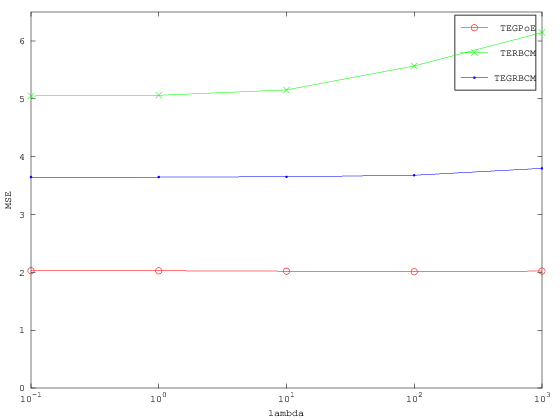

In [27]:
hold;
plot(x, y_tepoe_mse, '-ro');
plot(x, y_terbcm_mse, '-gx');
plot(x, y_tegrbcm_mse, '-b.');
set(gca,'xscale','log');
xlabel('lambda')
ylabel('MSE')
ylim([0, 6.5])
legend('TEGPoE', 'TERBCM', 'TEGRBCM')

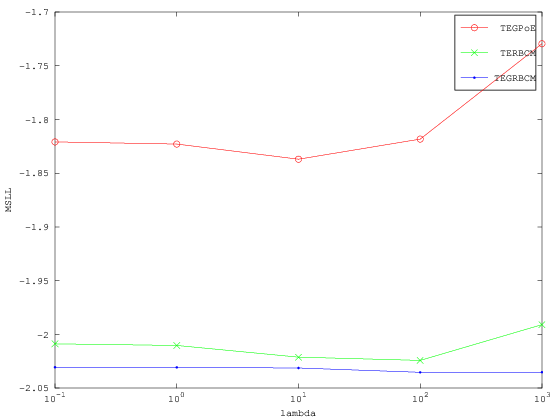

In [29]:
hold;
plot(x, y_tepoe_msll, '-ro');
plot(x, y_terbcm_msll, '-gx');
plot(x, y_tegrbcm_msll, '-b.');
set(gca,'xscale','log');
xlabel('lambda')
ylabel('MSLL')
%ylim([0, 6.5])
legend('TEGPoE', 'TERBCM', 'TEGRBCM')